Chi-square, 𝜒2 (categorial ~ categorial)

Computes the chi-square, 𝜒2, statistic and 𝑝-value for the hypothesis test of independence of frequencies in the observed contingency table (cross-table). The observed frequencies are tested against an expected contingency table obtained by computing expected frequencies based on the marginal sums under the assumption of independence.


Example: 

20 participants: 10 exposed to some chemical product and 10 non exposed (exposed = 1 or 0). 
Among the 20 participants 10 had cancer 10 not (cancer = 1 or 0). 
𝜒2 tests the association between those two variables.

In [8]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# Dataset 15 samples.. first 10 exposed

exposed =  np.array([1] * 10 + [0] * 10)

## First 8 with cancer, next 10 with non-cancer and last two with cancer

cancer = np.array([1] * 8 + [0] * 10 + [1] * 2) 

crosstab = pd.crosstab(exposed, cancer, rownames = ['Exposed'], colnames = ['Cancer'])

print('Observed Table of exposure:: ')
print('*' * 30)
print(crosstab)

Observed Table of exposure:: 
******************************
Cancer   0  1
Exposed      
0        8  2
1        2  8


In [12]:
## Performing chi square test

chi, pval, dof, expected = stats.chi2_contingency(crosstab)

print(f'Degree of freedom of samples is:: {dof}')
print('\nChi value of samples: %.4f \np-Value of the test is: %.4f' %(chi,pval))
print(f'\nExpected value of the test is:\n {expected}')

Degree of freedom of samples is:: 1

Chi value of samples: 5.0000 
p-Value of the test is: 0.0253

Expected value of the test is:
 [[5. 5.]
 [5. 5.]]


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("E:/Data Science/Datasets/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [46]:
table = pd.crosstab(index = df.gender, columns = df['race/ethnicity'], 
                    values = df['math score'],
                    aggfunc = np.mean,
                    margins = True)
table

race/ethnicity,group A,group B,group C,group D,group E,All
gender,,,,,,
female,58.527778,61.403846,62.033333,65.248062,70.811594,63.633205
male,63.735849,65.930233,67.611511,69.413534,76.746479,68.728216
All,61.629213,63.452632,64.463950,67.362595,73.821429,66.089000


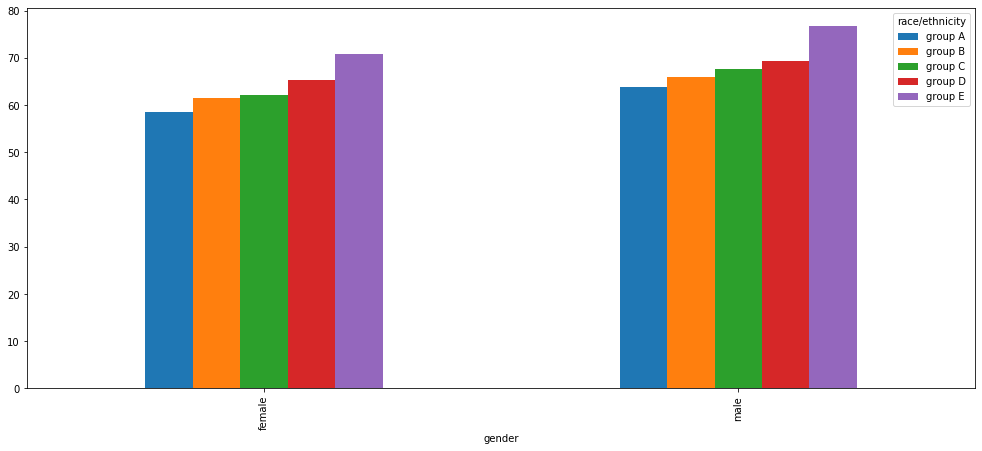

In [47]:
pd.crosstab(df.gender, df['race/ethnicity'], values = df['math score'],aggfunc = np.mean).plot(kind = 'bar', figsize = (17,7))

# Perfomring Chi Square test ::

- H0: The features Gender and Math Score are independent (which means they are not associated).
- H1: Gender and Interest are not independent (which means they are associated).


- Null Hypothesis :: Gender `doesnot` depend upon the math score obtained and are `independent of each other`
- Alternate Hypothesis :: Gender `does` depend upon the math score obtained and are `dependent of each other`

In [41]:
from scipy.stats import chi2_contingency

test_static, p_value, dof, expected_values = chi2_contingency(table)

print("Test Static Values is : %3.4f\nP- Value Calculated is : %3.4f\nDegree of Freedom is : %3.4f"%(test_static, p_value, dof))

Test Static Values is : 9.0274
P- Value Calculated is : 0.5295
Degree of Freedom is : 10.0000


In [43]:
print("Expected values are :: \n\n", expected_values)

Expected values are :: 

 [[  46.102   98.42   165.242  135.716   72.52   518.   ]
 [  42.898   91.58   153.758  126.284   67.48   482.   ]
 [  89.     190.     319.     262.     140.    1000.   ]]


In [48]:
# Checking whether to select null hypothesis or not

alpha = 0.05

if p_value <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')


Variables are not associated(fail to reject H0)


# Observation ::

Since calculated p value is greater than significance value hence we stick to null hypothesis and reject alternate hypothesis.